In [1]:

#standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


__3 data exploration tools using pandas__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# correlation

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)

df_dummies.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


From the above data exploratory tools in pandas, we can use regression analysis as a form of predictive analysis since there are no values missing, thus raw data for analysis, and there is a relationship between our target variable "Charges" and the other feature variables as shown by the correlation output. Also by encoding data, we can observe the relationship between the non-numerical variables with the target variable (charges)

__Visualize age distribution__

In [9]:
import plotly.express as px
fig = px.histogram(df, x="age")
fig.show()

From the plotly graph above the insurance cover is most popular with age  18-19 which has the highest count of 137 while age 64-65 has the lowest count of 22 which makes it the least popular age bracket for this insurance product, according to the data provided.

__Isolate continous and discrete columns__

In [10]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age', 'bmi', 'children', 'charges']

In [11]:
#isolate numerical discrete into a list named numerical_discrete
numerical_discrete = []

for var in numerical:
    if len(df[var].unique())<20 :
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

#Numerical_discrete column  list
numerical_discrete

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


['children']

In [12]:
# isolate numerical continous into a list named continuous_discrete
# skip the target variable charges, which is numerical

numerical_continuous = [var for var in numerical if var not in numerical_discrete and var not in [ 'charges']]
#column list continuous discrete
numerical_continuous

['age', 'bmi']

__Visualize presence of outliers in numerical continuous and resolve using z-score__

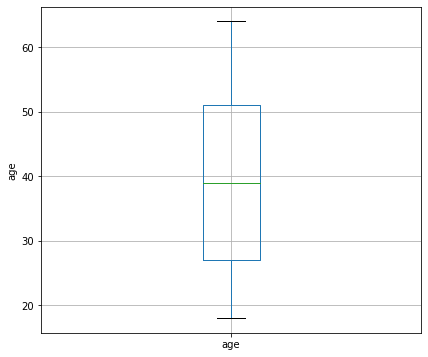

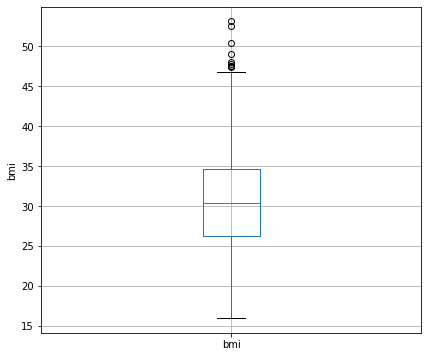

In [13]:

# let's make boxplots to visualise outliers in the continuous variables 

for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

In [14]:
#using z-score to resolve outliers in discrete_continous variables
from scipy import stats
df_numerical_continuous= df[["bmi", "age"]]
z = np.abs(stats.zscore( df_numerical_continuous))
print(z)

[[0.45332    1.43876426]
 [0.5096211  1.50996545]
 [0.38330685 0.79795355]
 ...
 [1.0148781  1.50996545]
 [0.79781341 1.29636188]
 [0.26138796 1.55168573]]


In [15]:
#use a threshhold to identify the outlier
threshold = 3
print(np.where(z > 3))

(array([ 116,  847, 1047, 1317], dtype=int64), array([0, 0, 0, 0], dtype=int64))


In [16]:
df_numerical_continuous.shape

(1338, 2)

In [17]:
#filtering out outliers from the continuous data
#data with no outliers
abs_z = np. abs(z)
filtered_entries = (abs_z < 3). all(axis=1)
new_df_numerical_continuous = df_numerical_continuous[filtered_entries]
print(new_df_numerical_continuous)

         bmi  age
0     27.900   19
1     33.770   18
2     33.000   28
3     22.705   33
4     28.880   32
...      ...  ...
1333  30.970   50
1334  31.920   18
1335  36.850   18
1336  25.800   21
1337  29.070   61

[1334 rows x 2 columns]


In [18]:
new_df_numerical_continuous.shape

(1334, 2)

By comparing the number of rows between the data before filtering out outliers and after filtering out we see that the new numerical continous data has less rows thus outliers have been filtered out.

__Visualize values from the resulting column to validate analysis above__

In [19]:
import plotly.express as px
fig = px.histogram(new_df_numerical_continuous, x="bmi")
fig.show()

From the histogram above we can prove outliers have been eliminated in the bmi column as we can see there is no bar that's isolated from the other bars which is a proof of no presence of outliers.

__Isolate all categorical names into a list named categorical__

In [20]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [21]:
#isolated categorical list
categorical

['sex', 'smoker', 'region']

__visually identify outliers in the discrete and categorical features__

<AxesSubplot:xlabel='children'>

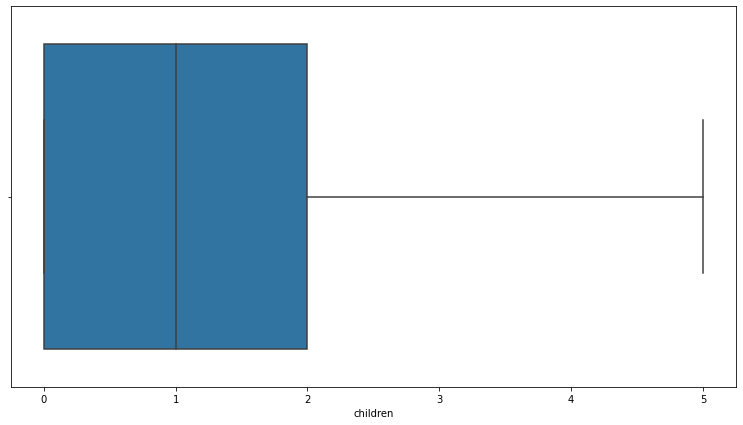

In [22]:
#Detect and remove outliers: Discrete: children

plt.figure(figsize=(13,7))
sns.boxplot(df.children)

There are no outliers in the children column which is a discrete variable.

<AxesSubplot:>

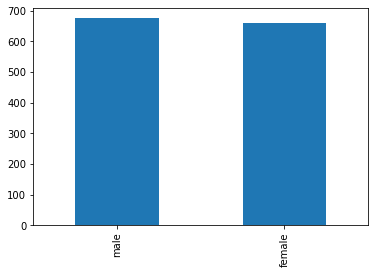

In [23]:
#categorical features
df['sex'].value_counts().plot(kind='bar')


<AxesSubplot:>

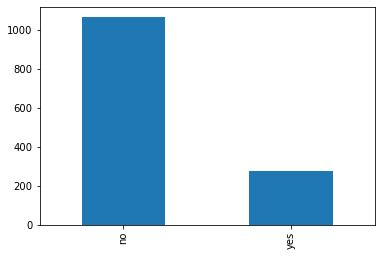

In [24]:
df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot:>

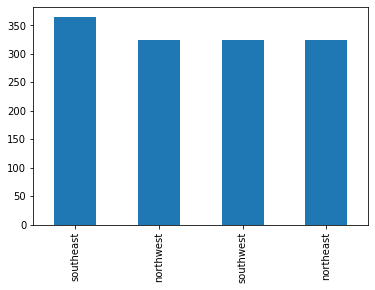

In [25]:
df['region'].value_counts().plot(kind='bar')

From the bar graphs we can clearly see that there are no outliers, sex and smoker columns are binary thus no outliers and region has no anomalies

__encode discrete and categorical data__

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
df.sex = le.fit_transform(df.sex)
#smoker
df.smoker = le.fit_transform(df.smoker)
#region
df.region = le.fit_transform(df.region)
#children
df.children = le.fit_transform(df.children)



df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


__separate your features from the target__

In [27]:
# Create X (all the feature columns)
X = df.drop("charges", axis=1)

# Create y (the target column)
Y = df["charges"]

In [28]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [29]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
#Check corellation to determine which variable affects charges the least
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


from the correlation output both negative and positive, region has the least corellation to charges of the insurance product, thus it does not have much effect on the charges.For this reason we drop the region column.


In [31]:
#Dropping unwanted columns in this case region from our features

#axis 1 - columns
#axis 0 - rows
X = X.drop(['region'], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
